In [1]:
import geopandas as gpd
import osmnx as ox

%matplotlib inline

## Boundary Polygons

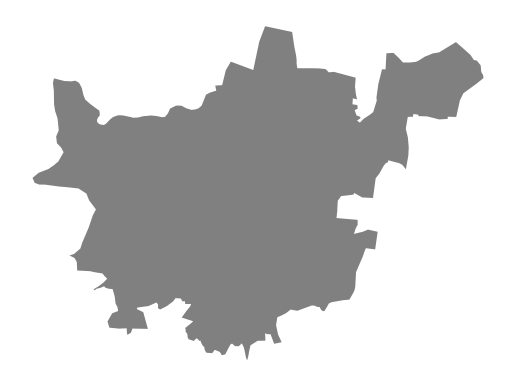

In [2]:
# get the boundary polygon for pune, project it, and plot it
city = ox.geocode_to_gdf("Pune, India")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")

## Network Graphs

OSMnx allows you to to get street networks for places which have defined polygons in OSM (OpenStreetMap). I tried doing this with bigger cities like Pune and Munich, but the time it takes to execute is far to long to justify being used as an example to learn OSMnx features. So I am sticking with the example the authors of this package picked, an apparently small city called Piedmont in California, USA.

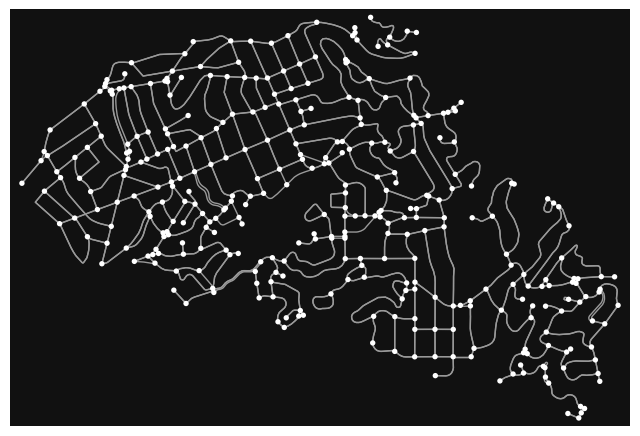

In [3]:
# download/model a street network for some city then visualize it

graph_piedmont = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig_piedmont, ax_piedmont = ox.plot_graph(graph_piedmont)

I can make a zhuzhed up version of the same graph. I make use of the optional arguments of `plot_graph()` to change the edge and node width/size and color and the background color. I am making this particular version hideously garish on purpose, just to show that this is possible with this library.  

I also use the `simplify` and `clean_periphery` arguments in `graph_from_place()`, but apparently, they don't bring anything to a network as small as Piedmont's.  

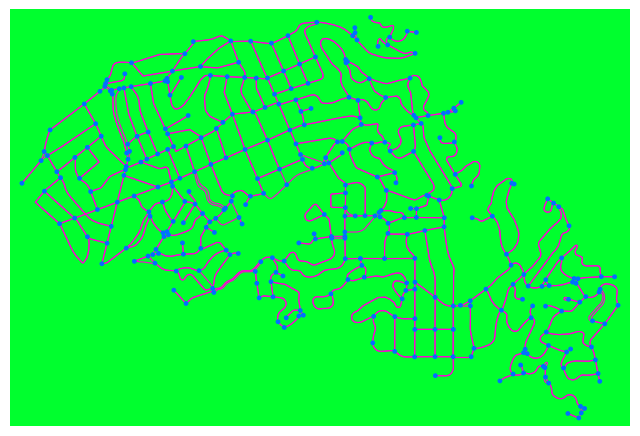

In [4]:
graph_piedmont2 = ox.graph_from_place("Piedmont, California, USA", network_type="drive", simplify=True, clean_periphery=True)
fig_piedmont2, ax_piedmont2 = ox.plot_graph(graph_piedmont2,
                                            node_size=12, node_color="#0070ff",
                                            edge_linewidth=0.8, edge_color="#ff00d5",
                                            bgcolor="#00ff2e")

Not every place has a big enough polygon in OSM. For example, I tried the above with my neighborhood in Pune and it said, "Computer says no." I am kidding, it did not make a Little Britain reference, but it did throw this error:  
`ValueError: Found no graph nodes within the requested polygon`  

In such cases, the `graph_from_point()` function comes to the rescue. I picked one of my favourite spots in Kothrud, Pune, got its coordinates off of OSM, plugged them into the function and set `dist` to `1000`(i.e., look for nodes in a 1000-meter radius around the given coordinates), and voila!  

I can also save the generated graph by adding the `save` and `filepath` arguments to `plot_graph()`.

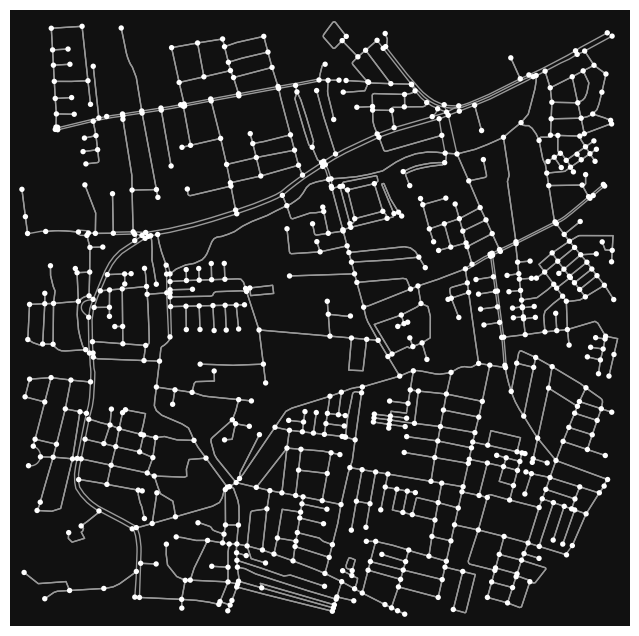

In [5]:
# get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
kothrud_coords = (18.49949, 73.82097)
graph_kothrud = ox.graph_from_point(kothrud_coords, dist=1000, network_type="drive") # dist in meters

# don't save the generated graph:
fig_kothrud, ax_kothrud = ox.plot_graph(graph_kothrud)

# save the generated graph:
# fig_kothrud, ax_kothrud = ox.plot_graph(graph_kothrud, save=True, filepath='./plots/kothrud.png')